# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: Image transformations
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np
import torch 

# NEW!
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import a dataset

In [ ]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [2]:
# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

100.0%


Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [3]:
# check out the shape of the dataset
print( cdata.data.shape )

# the unique categories
print( cdata.classes )

# .targets is a list of targets converted to ints
print( len(cdata.targets) )

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


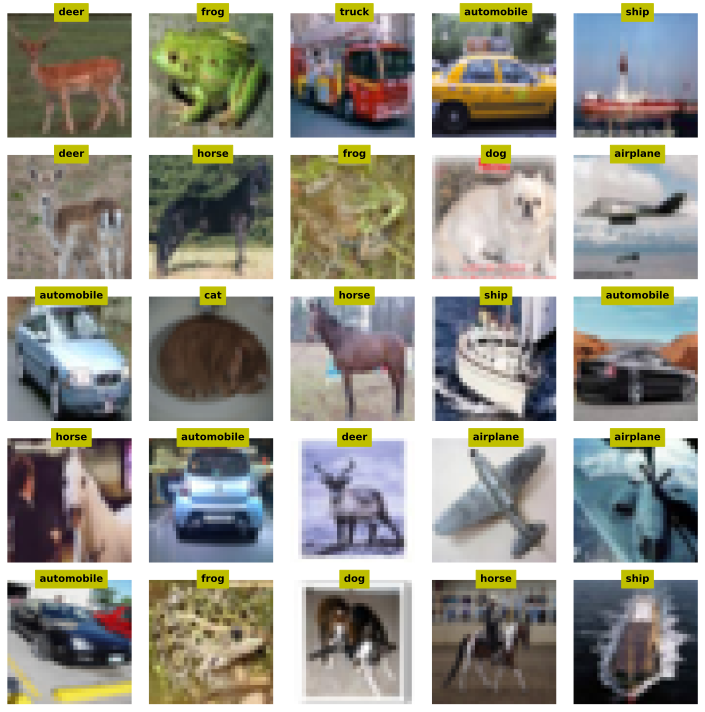

In [4]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))

  # extract that image
  pic = cdata.data[randidx,:,:,:]
  # and its label
  label = cdata.classes[cdata.targets[randidx]]

  # and show!
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

# Apply some transformations

In [7]:
# T compose it's a way to chain multiple transformations together
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32*4), # increase the size of the resolution by 4
                 T.Grayscale(num_output_channels=1)  ])

# include the transform in the dataset
# Normally we include the transformation in the dataset
cdata.transform = Ts

# you can also apply the transforms immediately when loading in the data
# cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True, transform=Ts)


# Important! Adding a transform doesn't change the image data:
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


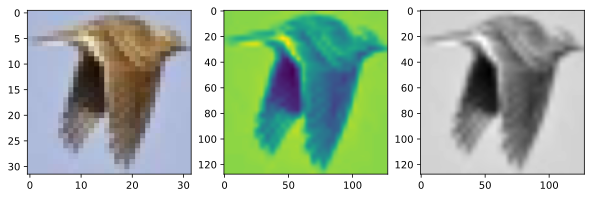

In [ ]:
# apply the transform

# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform
img2 = cdata.transform( cdata.data[123,:,:,:] )

# let's see what we've done!
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1)) # the default color scheme is verdant (or something like that)
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()

In [14]:
# Note about ToTensor() and normalization:
help(T.ToTensor)

Help on class ToTensor in module torchvision.transforms.transforms:

class ToTensor(builtins.object)
 |  ToTensor() -> None
 |
 |  Convert a PIL Image or ndarray to tensor and scale the values accordingly.
 |
 |  This transform does not support torchscript.
 |
 |  Converts a PIL Image or numpy.ndarray (H x W x C) in the range
 |  [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
 |  if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
 |  or if the numpy.ndarray has dtype = np.uint8
 |
 |  In the other cases, tensors are returned without scaling.
 |
 |  .. note::
 |      Because the input image is scaled to [0.0, 1.0], this transformation should not be used when
 |      transforming target image masks. See the `references`_ for implementing the transforms for image masks.
 |
 |  .. _references: https://github.com/pytorch/vision/tree/main/references/segmentation
 |
 |  Methods defined here:
 |
 |  __call__(self, pic)
 |     

# Additional explorations

In [ ]:
# 1) There are many other transforms available in torchvision: https://pytorch.org/vision/stable/transforms.html
#    Many transformations are useful for data preparation and augmentation. We'll cover some of them later in the course,
#    but for now, read about RandomCrop(), RandomHorizontalFlip(), and CenterCrop(). Then implement them to understand 
#    what they do to images.
#    Tip: It's probably best to test these transforms separately, and on one test image, as we did above.
# 